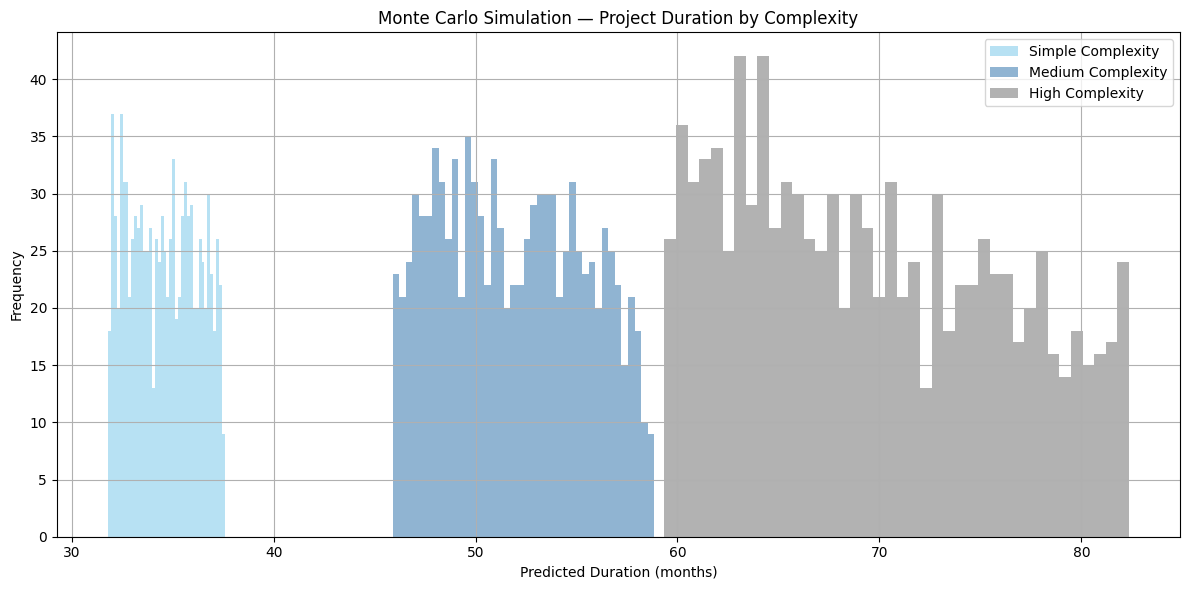

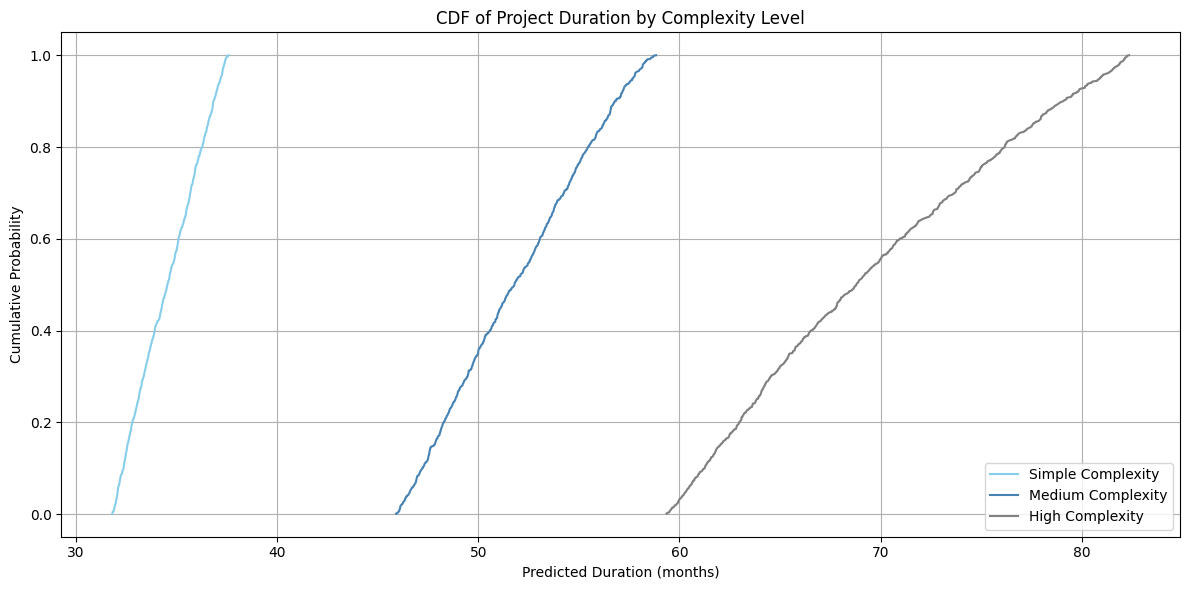

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
size_m2 = 5000
num_architects = 2
num_engineers = 3
num_workers = 25
num_simulations = 1000

# --- EFFICIENCY FUNCTION ---
def get_efficiency(n):
    if n <= 4:
        return 0.75
    elif n <= 8:
        return 0.60
    else:
        return 0.55

eff_arch = get_efficiency(num_architects)
eff_eng = get_efficiency(num_engineers)

# --- COMPLEXITY LEVEL SETTINGS ---
complexity_settings = {
    "Simple": {"k_arch_range": (0.13, 0.17), "k_eng_range": (0.08, 0.12), "prod_range": (5.5, 6.5)},
    "Medium": {"k_arch_range": (0.18, 0.22), "k_eng_range": (0.13, 0.17), "prod_range": (3.5, 4.5)},
    "High": {"k_arch_range": (0.28, 0.32), "k_eng_range": (0.18, 0.22), "prod_range": (2.5, 3.5)},
}

# --- RUN MONTE CARLO SIMULATION ---
results = {}

for level, settings in complexity_settings.items():
    durations = []
    for _ in range(num_simulations):
        k_arch = np.random.uniform(*settings["k_arch_range"])
        k_eng = np.random.uniform(*settings["k_eng_range"])
        prod_worker = np.random.uniform(*settings["prod_range"])

        # Design phase durations
        T_design = (k_arch * size_m2) / (num_architects * eff_arch) / (160 * 4)
        T_eng = (k_eng * size_m2) / (num_engineers * eff_eng) / (160 * 4)

        # Construction phase
        T_construction = size_m2 / (num_workers * prod_worker)

        total_duration = T_design + T_eng + T_construction
        durations.append(total_duration)

    results[level] = durations

# --- HISTOGRAM with custom colors ---
plt.figure(figsize=(12, 6))

colors = {
    "Simple": "skyblue",      # light blue
    "Medium": "steelblue",    # darker blue
    "High": "gray"            # gray
}

for level, durations in results.items():
    plt.hist(durations, bins=40, alpha=0.6, label=f"{level} Complexity", color=colors[level])

plt.title("Monte Carlo Simulation — Project Duration by Complexity")
plt.xlabel("Predicted Duration (months)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- CDF PLOT ---
plt.figure(figsize=(12, 6))
for level, durations in results.items():
    sorted_durations = np.sort(durations)
    cdf = np.arange(1, len(sorted_durations) + 1) / len(sorted_durations)
    plt.plot(sorted_durations, cdf, label=f"{level} Complexity", color=colors[level])

plt.title("CDF of Project Duration by Complexity Level")
plt.xlabel("Predicted Duration (months)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

